# INCOME QUALIFICATION

## Description

Identify the level of income qualification needed for the families in Latin America.

## Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Eliminate warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
print ("No of elements in test dataframe is {}".format(len(test_df)))
print ("No of elements in train dataframe is {}".format(len(train_df)))


#Filling missing values in test vsv with Nan
#test_df.Target = np.nan
bckup_label = train_df['Target']
train_df.drop(['Target'],axis =1 ,inplace =True)


No of elements in test dataframe is 23856
No of elements in train dataframe is 9557


In [5]:
#Merging the train and test data set to form a complete dataset using Pandas concat along row axis
df = pd.concat([train_df,test_df] ,ignore_index =True ,axis = 0)
df['Target'] = bckup_label
train_df['Target'] = bckup_label


In [6]:
#Step 1 : Check the info
df.info()
print (len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33413 entries, 0 to 33412
Columns: 143 entries, Id to Target
dtypes: float64(9), int64(129), object(5)
memory usage: 36.5+ MB
33413


## Task 1: Identify the output variable.

In [7]:
#Target column denoting the level of poverty in homes will be the output variable

train_df['Target'].to_frame()



,Target
0,4
1,4
2,4
3,4
4,4
...,...
9552,2
9553,2
9554,2
9555,2


In [8]:
# Describe the central tendency, dispersion and shape of a dataset’s distribution,
#eg. If mean and 50% are around same area then there are no outliers and distribution is normalized
df.describe() 


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9.150000e+03,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,7945.000000,33413.000000,33413.000000,...,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33377.000000,33413.000000,9557.000000
mean,1.720308e+05,0.047077,4.955706,0.027055,0.993326,0.960464,0.237782,1.364003,0.407775,1.562595,...,74.384820,1653.786909,19.118966,53.919343,3.873851,3.474577,4.094081,101.104384,1653.786909,3.302292
std,1.550035e+05,0.211808,1.519659,0.162247,0.081423,0.194868,0.425731,0.714483,0.704245,1.003650,...,76.933222,1750.049285,17.737165,77.637447,6.898213,6.053864,12.939225,90.467735,1750.049285,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.350000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000,4.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1369.000000,9409.000000,4.000000


## Task 2: Understand the type of Data

In [9]:
df.Id.unique()     #1. Unique ID - String
df.v2a1.unique()   #2. Monthly rent payment  - Numeric continuous
df.hacdor.unique() #3. Overcrowding by bedrooms - One Hot Encoded - This can be considered binary as well.
df.rooms.unique()  #4. number of all rooms in the house- Numeric discrete

df.hacapo.unique() #5. =1 Overcrowding by rooms - One Hot Encoded - This can be considered binary as well.
df.v14a.unique()   #6., =1 has bathroom in the household - Binary
df.refrig.unique() #7. , =1 if the household has a refrigerator - Binary
df.v18q.unique()   #8., owns a tablet - Binary
df.v18q1.unique()  #9. number of tablets household owns -numeric discrete
df.r4h1.unique()   #10. Males younger than 12 years of age - numeric discrete
df.r4h2.unique()   #11. Males 12 years of age and older- numeric discrete
df.r4h3.unique()   #12. Total males in the household -  numeric discrete
df.r4m1.unique()   #13. Females younger than 12 years of age -  numeric discrete 
df.r4m2.unique()   #14. Females 12 years of age and older -  numeric discrete
df.r4m3.unique()   #15. Total females in the household -  numeric discrete
df.r4t1.unique()   #16., persons younger than 12 years of age -  numeric discrete
df.r4t2.unique()   #17., persons 12 years of age and older - numeric discrete
df.r4t3.unique()   #18., Total persons in the household -  numeric discrete
df.tamhog.unique() #19., size of the household -  numeric discrete
df.tamviv.unique() #20., number of persons living in the household - numeric discrete
df.escolari.unique()#21., years of schooling - numeric discrete
df.rez_esc.unique()#22. Years behind in school -numeric continuous
df.hhsize.unique() #23 household size - numeric discrete
df.paredblolad.unique()#24, if predominant material on the outside wall is block or brick - binary

# Similar to 24 rows from 25 to 95 are One Hot Encoded data (1 or 0) - This can be considered binary as well.
df.idhogar.unique()#96, Household level identifier - String value
    
df.hogar_nin.unique()#97, Number of children 0 to 19 in household - numeric discrete
df.hogar_adul.unique()#98 Number of adults in household - numeric discrete
df.hogar_mayor.unique() #99 of individuals 65+ in the household - numeric discrete
df.hogar_total.unique()#100 of total individuals in the household - numeric discrete

df.dependency.unique()  #101, Cleaning Required Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
df.edjefe.unique()      #102 , Cleaning Required years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
df.edjefa.unique()      #103, Cleaning Required years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 

df.meaneduc.unique()    #104,average years of education for adults (18+) - numeric continuous
# Similar to 24 rows from [105 to 113] are One Hot Encoding data (1 or 0) - This can be considered binary as well.
df.bedrooms.unique()    #114. number of bedroom - numeric discrete
df.overcrowding.unique()#115 -persons per room numeric continuous

# Similar to 24 rows from [116 to 120] are One Hot data (1 or 0)
# [121 to 123] entries are binary
df.computer.unique()    #121.  =1 if the household has notebook or desktop computer - binary
df.television.unique()  #122. =1 if the household has TV -binary
df.mobilephone.unique() #123.  =1 if mobile phone -binary

df.qmobilephone.unique()#124.  # of mobile phone - numeric discrete

# Similar to 24 rows from [125 to 130] are Lugar Region One Hot Encoded data (1 or 0) - This can be considered binary as well.
df.area1.unique()       #131. =1 zona urbana  Binary
df.area2.unique()       #132. =2 zona rural Binary
df.age.unique()         #133. Age in years - numeric discrete
df.SQBescolari.unique() #134.escolari squared  - numeric continuous
#Similar to 134 data from 135 to 142 are  numeric continuous

df.dtypes.to_frame(name = 'Data Type of the Column')


,Data Type of the Column
Id,object
v2a1,float64
hacdor,int64
rooms,int64
hacapo,int64
...,...
SQBovercrowding,float64
SQBdependency,float64
SQBmeaned,float64
agesq,int64


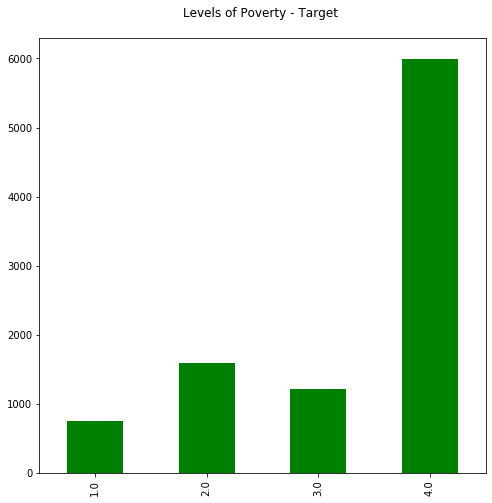

In [10]:

df1 = df['Target'].value_counts().sort_index().plot(kind='bar',figsize = (8, 8), color='green')

plt.title('Levels of Poverty - Target \n')
plt.show()

In [11]:
#Let us clean the below Object type data
df.dependency.unique()  #101, Cleaning Required Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
df.edjefe.unique()      #102 , Cleaning Required years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
df.edjefa.unique()      #103, Cleaning Required years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
df.dependency.replace(['yes','no'], [1,0], inplace =True)
df.edjefe.replace(['yes','no'], [1,0], inplace =True)
df.edjefa.replace(['yes','no'], [1,0], inplace =True)
df.dependency=round(df.dependency.astype(np.float64),2)
df.edjefe=round(df.edjefe.astype(np.float64),2)
df.edjefa=round(df.edjefa.astype(np.float64),2)
df.dependency.unique()

array([0.  , 8.  , 1.  , 3.  , 0.5 , 0.25, 2.  , 0.67, 0.33, 1.5 , 0.4 ,
       0.75, 1.25, 0.2 , 2.5 , 1.2 , 4.  , 1.33, 2.25, 0.22, 5.  , 0.83,
       0.8 , 6.  , 3.5 , 1.67, 0.29, 1.75, 0.71, 0.17, 0.6 , 0.38, 0.14,
       0.86, 0.12, 2.33, 7.  , 3.33])

## Task 3: Check if there are any biases in your dataset.

In [12]:
#Handling Outliers for all numeric columns
#Numeric columns - Salary
#To remove Outlier we can use 1.5 IQR Rule
def outlierDetection(datacolumn):
    #Sort the data in ascending order
    #GET Q1 and Q3
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    
    #Calc IQR
    IQR = Q3 - Q1
    
    #Calc LowerRange
    lr = Q1 - (1.5 * IQR)
    #Calc Upper Range
    ur = Q3 + (1.5 * IQR)
    #return 1,2
    return lr,ur

In [13]:
#Handle Outlier Detection for numeric columns
cols_list = df.columns.to_list()
numeric_cols = [cols_list[1]] + [cols_list[3]] + cols_list[8:23] + cols_list[96:100] +[cols_list[103]]+cols_list[113:115] + cols_list[133:142]
#numeric_cols = ['rooms']
print (numeric_cols)
#numeric_cols = ['v2a1', 'rooms', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'meaneduc', 'bedrooms', 'overcrowding', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
#numeric_cols = ['r4h1', 'r4m1', 'escolari']
for column in numeric_cols:
    print ("Col %r " % column)
    try:
        lowerRange,upperRange = outlierDetection(df[column])
    except:
        print ("Exception reached for col %r " % column)
    outlier_upper = df[column] > upperRange 
    outlier_lower = df[column] < lowerRange
    if outlier_upper.any() or outlier_lower.any():
        print ("Outlier Detected for %r " % column)
        #print ("Length of df before dropping %r " % len(df))
        #Please uncomment the below lines if you want to drop outlier rows
        #df.drop(df[(df[column] > upperRange) | (df[column] < lowerRange)].index , inplace=True)
        #print ("Length of df after dropping %r " % len(df))
        df.set_index(np.arange(0,len(df)) , inplace=True)

        
#Conclusion: Outlier has been detected for few of the columns as displayed

['v2a1', 'rooms', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'meaneduc', 'bedrooms', 'overcrowding', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
Col 'v2a1' 
Col 'rooms' 
Outlier Detected for 'rooms' 
Col 'v18q1' 
Col 'r4h1' 
Outlier Detected for 'r4h1' 
Col 'r4h2' 
Outlier Detected for 'r4h2' 
Col 'r4h3' 
Outlier Detected for 'r4h3' 
Col 'r4m1' 
Outlier Detected for 'r4m1' 
Col 'r4m2' 
Outlier Detected for 'r4m2' 
Col 'r4m3' 
Outlier Detected for 'r4m3' 
Col 'r4t1' 
Outlier Detected for 'r4t1' 
Col 'r4t2' 
Outlier Detected for 'r4t2' 
Col 'r4t3' 
Outlier Detected for 'r4t3' 
Col 'tamhog' 
Outlier Detected for 'tamhog' 
Col 'tamviv' 
Outlier Detected for 'tamviv' 
Col 'escolari' 
Col 'rez_esc' 
Col 'hhsize' 
Outlier Detected for 'hhsize' 
Col 'hogar_nin' 
O

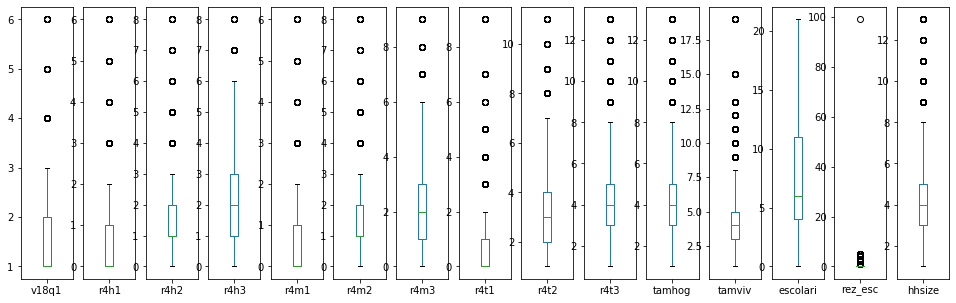

In [14]:
import matplotlib.pyplot as plt
num_index =[]
num_index.extend(range(8,23))

box_df = df.iloc[:,num_index]

box_df.plot(kind='box', figsize= (20,5),subplots=True, layout=(1,18))
plt.show() # Plots indicate that there are outliers

## Task 4:Check whether all members of the house have the same poverty level.

In [15]:
#First do group by on #idhogar - Household level identifier
#Check for no of unique elements of Target variable..ie Poverty Level for each household
#Check if this number is not equal to 1 ..ie this would indicate that there are more than one level
#of poverty within the same household
#Print the sum of these entries. This would give the no of households that do not have the same poverty level
households_not_same_level = (train_df.groupby(['idhogar'])['Target'].nunique()!=1).sum()
print (" The no of households that do not have same poverty level are {}".format(households_not_same_level))
    

 The no of households that do not have same poverty level are 85


## Task 5: Check if there is a house without a family head

In [16]:
#First do group by on #idhogar - Household level identifier
#Check for max value of 'parentesco1' variable.. =1 if household head.
#Check if this max is not equal to 1 ..ie this would indicate that there is no family head
# within the same household. Print the sum of these entries.
# This would give the no of households that do not have the same poverty level
households_without_head = (train_df.groupby(['idhogar'])['parentesco1'].max()!=1).sum()
print (" The no of households that do not have a family head are {}".format(households_without_head))
    

 The no of households that do not have a family head are 15


## Task 6: Set poverty level of the members and the head of the house within a family.

In [17]:

# Groupby the household and figure out the number of unique values
equal_level = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
diff_level = equal_level[equal_level != True]
print('There are {} households where the family members do not all have the same target.'.format(len(diff_level)))

# Iterate through each household
for household in diff_level.index:
    # Find the correct label (for the head of household)
    label = int(train_df[(train_df['idhogar'] == household) & (train_df['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train_df.loc[train_df['idhogar'] == household, 'Target'] = label
    
# Groupby the household and figure out the number of unique values
equal_level = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
diff_level = equal_level[equal_level != True]
print('There are {} households where the family members do not all have the same target.All members have been set to same level'.format(len(diff_level)))



There are 85 households where the family members do not all have the same target.
There are 0 households where the family members do not all have the same target.All members have been set to same level


## Task 7: Count how many null values are existing in columns.

In [18]:
train_df.isna().sum(axis=0).sort_values(ascending=False).head().to_frame(name='No of missing values in Train')

,No of missing values in Train
rez_esc,7928
v18q1,7342
v2a1,6860
meaneduc,5
SQBmeaned,5


In [19]:
test_df.isna().sum().sort_values(ascending = False).head(7).to_frame(name='No of missing values in Test')

,No of missing values in Test
rez_esc,19653
v18q1,18126
v2a1,17403
SQBmeaned,31
meaneduc,31
public,0
sanitario2,0


In [20]:
train_df[train_df['meaneduc'].isna()]['SQBmeaned'].value_counts() #Indicates that there is a strong dependency on thse two
test_df[test_df['meaneduc'].isna()]['SQBmeaned'].value_counts() #Indicates that there is a strong dependency on thse two


Series([], Name: SQBmeaned, dtype: int64)

#### Missing Value Treatment 1: v18q1 , number of tablets household owns 

In [21]:
print ("Total missing values in train for  v18q1 , number of tablets household owns %r" % train_df.v18q1.isna().sum())
print ("Total missing values in  test for v18q1 , number of tablets household owns %r" % test_df.v18q1.isna().sum())

#Let us see if we can correlate to the variable v18q, owns a tablet 
print ("v18q var..ie Members in train who own tablet or not when there are NA vals in v18q  {}".format(train_df[train_df.v18q1.isna()]['v18q'].unique())) 
print ("v18q var..ie Members in test who own tablet or not when there are NA vals in v18q {} ".format(test_df[test_df.v18q1.isna()]['v18q'].unique())) 

#Conclusion: Since missing values in number of tablets (v18q1) corresponds to the fact that those members 
#did not own a tablet itself in the first place (as referenced by v18q) , lets replace na with 0
train_df.v18q1.fillna(0, inplace=True)
test_df.v18q1.fillna(0, inplace=True)

Total missing values in train for  v18q1 , number of tablets household owns 7342
Total missing values in  test for v18q1 , number of tablets household owns 18126
v18q var..ie Members in train who own tablet or not when there are NA vals in v18q  [0]
v18q var..ie Members in test who own tablet or not when there are NA vals in v18q [0] 


#### Missing Value Treatment 2: rez_esc Years behind in school

In [22]:
print ("Total missing values in train rez_esc Years behind in school  %r" % train_df.rez_esc.isna().sum())

print (train_df[train_df['rez_esc'].notna()]['age'].describe()) #- indicates that the age of memebers must be between 7 and 17
print (train_df[train_df['rez_esc'].isna()]['age'].value_counts().head(10)) #- most of them are not between 7 and 17 - completed education. So years left behind will be 0.
train_df.rez_esc.fillna(0,inplace=True)

print ("Total missing values in test  rez_esc Years behind in school  %r" % test_df.rez_esc.isna().sum())

print (test_df[test_df['rez_esc'].notna()]['age'].describe()) #- indicates that the age of memebers must be between 7 and 17
print (test_df[test_df['rez_esc'].isna()]['age'].value_counts().head(10)) #- most of them are not between 7 and 17 - completed education. So years left behind will be 0.
test_df.rez_esc.fillna(0,inplace=True)


Total missing values in train rez_esc Years behind in school  7928
count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64
23    189
20    179
18    179
30    178
19    170
22    166
21    163
28    159
27    157
24    156
Name: age, dtype: int64
Total missing values in test  rez_esc Years behind in school  19653
count    4203.000000
mean       12.157507
std         3.190886
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64
20    412
18    411
32    409
22    408
25    398
19    396
30    392
23    392
24    386
21    385
Name: age, dtype: int64


#### Missing Value Treatment 3: v2a1 - monthly rent treatment

In [23]:
# tipovivi1, =1 own and fully paid house 
# tipovivi2, "=1 own,  paying in installments
# tipovivi3, =1 rented 
# tipovivi4, =1 precarious 
# tipovivi5, "=1 other(assigned,  borrowed) 
print ("Total missing values in TRAIN v2a1- # monthly rent payment %r" % train_df.v2a1.isna().sum())

print (train_df[train_df.v2a1.isna()]['tipovivi1'].value_counts())  #-indicates that there are 5911 are own house when v2a1 has na!
print (train_df[train_df.v2a1.isna()]['tipovivi2'].value_counts())  #-indicates that there are no members with own paying in installments when v2a1 has na
print (train_df[train_df.v2a1.isna()]['tipovivi3'].value_counts())  #-indicates that there are no rented members when v2a1 has na!
print (train_df[train_df.v2a1.isna()]['tipovivi4'].value_counts())  #-indicates that there are 163 members who live in precarious houses when v2a1 has na!
print (train_df[train_df.v2a1.isna()]['tipovivi5'].value_counts())  #-indicates that there are 786 memebers assigned / borrowed when v2a1 has na!

#Since from the above inferences , we can fill (5911)  + (163) members of v2a1 with 0 since they have either fully paid own house or precarious
train_df.v2a1.loc[train_df.v2a1.isna() & train_df.tipovivi1 ==1] = 0
train_df.v2a1.loc[train_df.v2a1.isna() & train_df.tipovivi4 ==1] = 0
#Replace the rest with mean as we are dealing with numeric continuous data
train_df.v2a1.fillna(train_df.v2a1.mean(), inplace =True) 


# tipovivi1, =1 own and fully paid house 
# tipovivi2, "=1 own,  paying in installments
# tipovivi3, =1 rented 
# tipovivi4, =1 precarious 
# tipovivi5, "=1 other(assigned,  borrowed) 
print ("Total missing values in TEST v2a1- # monthly rent payment %r" % test_df.v2a1.isna().sum())

print (test_df[test_df.v2a1.isna()]['tipovivi1'].value_counts())  #-indicates that there are 5911 are own house when v2a1 has na!
print (test_df[test_df.v2a1.isna()]['tipovivi2'].value_counts())  #-indicates that there are no members with own paying in installments when v2a1 has na
print (test_df[test_df.v2a1.isna()]['tipovivi3'].value_counts())  #-indicates that there are no rented members when v2a1 has na!
print (test_df[test_df.v2a1.isna()]['tipovivi4'].value_counts())  #-indicates that there are 163 members who live in precarious houses when v2a1 has na!
print (test_df[test_df.v2a1.isna()]['tipovivi5'].value_counts())  #-indicates that there are 786 memebers assigned / borrowed when v2a1 has na!

#Since from the above inferences , we can fill (14933)  + (434) members of v2a1 with 0 since they have either fully paid own house or precarious
test_df.v2a1.loc[test_df.v2a1.isna() & test_df.tipovivi1 ==1] = 0
test_df.v2a1.loc[test_df.v2a1.isna() & test_df.tipovivi4 ==1] = 0
#Replace the rest with mean as we are dealing with numeric continuous data
test_df.v2a1.fillna(test_df.v2a1.mean(), inplace =True) 

Total missing values in TRAIN v2a1- # monthly rent payment 6860
1    5911
0     949
Name: tipovivi1, dtype: int64
0    6860
Name: tipovivi2, dtype: int64
0    6860
Name: tipovivi3, dtype: int64
0    6697
1     163
Name: tipovivi4, dtype: int64
0    6074
1     786
Name: tipovivi5, dtype: int64
Total missing values in TEST v2a1- # monthly rent payment 17403
1    14933
0     2470
Name: tipovivi1, dtype: int64
0    17403
Name: tipovivi2, dtype: int64
0    17403
Name: tipovivi3, dtype: int64
0    16969
1      434
Name: tipovivi4, dtype: int64
0    15367
1     2036
Name: tipovivi5, dtype: int64


#### Final Missing Value treatment as the SQBmeaned and meaneduc are also numeric continuous

In [24]:
train_df.fillna (train_df.mean(), inplace = True)
test_df.fillna (train_df.mean(), inplace = True)

In [25]:
train_df.isna().sum(axis=0).sort_values(ascending=False).head().to_frame(name='No of missing values in TRAIN after cleaning')


,No of missing values in TRAIN after cleaning
Target,0
abastaguano,0
sanitario2,0
sanitario1,0
coopele,0


In [26]:
test_df.isna().sum(axis=0).sort_values(ascending=False).head().to_frame(name='No of missing values in TEST after cleaning')

,No of missing values in TEST after cleaning
agesq,0
abastaguano,0
sanitario2,0
sanitario1,0
coopele,0


In [27]:
#Let us clean the below Object type data for TRAIN
# The squared dependency and squared edjefe have values of 0 and 1 for yes and no. 
#So let us do replace yes with 1 and no with 0 for these 3 columns as a first step

train_df.dependency.unique()  #101, Cleaning Required Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
train_df.edjefe.unique()      #102 , Cleaning Required years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
train_df.edjefa.unique()      #103, Cleaning Required years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
train_df.dependency.replace(['yes','no'], [1,0], inplace =True)
train_df.edjefe.replace(['yes','no'], [1,0], inplace =True)
train_df.edjefa.replace(['yes','no'], [1,0], inplace =True)
train_df.dependency=round(train_df.dependency.astype(np.float64),2)
train_df.edjefe=round(train_df.edjefe.astype(np.float64),2)
train_df.edjefa=round(train_df.edjefa.astype(np.float64),2)
train_df.dependency.unique()

#Let us clean the below Object type data for TEST
# The squared dependency and squared edjefe have values of 0 and 1 for yes and no.
test_df.dependency.unique()  #101, Cleaning Required Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
test_df.edjefe.unique()      #102 , Cleaning Required years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
test_df.edjefa.unique()      #103, Cleaning Required years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
test_df.dependency.replace(['yes','no'], [1,0], inplace =True)
test_df.edjefe.replace(['yes','no'], [1,0], inplace =True)
test_df.edjefa.replace(['yes','no'], [1,0], inplace =True)
test_df.dependency=round(test_df.dependency.astype(np.float64),2)
test_df.edjefe=round(test_df.edjefe.astype(np.float64),2)
test_df.edjefa=round(test_df.edjefa.astype(np.float64),2)
test_df.dependency.unique()



array([0.5 , 0.  , 8.  , 1.  , 0.25, 2.  , 0.33, 0.38, 0.6 , 1.5 , 0.2 ,
       0.75, 0.67, 3.  , 0.14, 0.4 , 0.8 , 1.67, 0.29, 1.25, 2.5 , 5.  ,
       0.86, 1.33, 0.17, 4.  , 0.12, 0.83, 2.33, 7.  , 1.2 , 3.5 , 2.25,
       3.33, 6.  ])

## Task 8: Remove null value rows of the target variable.

In [28]:
print ("Null value rows of target variable %r " % df['Target'].isna().sum() )#Indicates the total number of test data -Let us drop them
print (len(df))
df.drop(df[df.Target.isna()].index,inplace = True)
print ("Null value rows of target variable after dropping %r " % df['Target'].isna().sum())# Null value rows have now been dropped
df.set_index(np.arange(0,len(df)),inplace =True)
print (len(df))

#Since this data corresponds to the train data, let us replace df with train data as its already cleaned
df = train_df

Null value rows of target variable 23856 
33413
Null value rows of target variable after dropping 0 
9557


## Task 9: Predict the accuracy using random forest classifier.

In [29]:
#Let us drop the ID column as its not contributing to model.
df.drop(['Id', 'idhogar'], axis = 1, inplace = True)
test_df.drop(['Id', 'idhogar'], axis = 1, inplace = True)

#Seperate your data into features and label. Ensure they are in the form of numpy arrays
bckup_features = df.iloc[:,:-1]
features = df.iloc[:,:-1].values
label = df.Target.values



In [30]:
# 1. Initialize the model's algorithm
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(max_depth=8)
modelForRFE = RFModel
# 2. Apply RFE to model (ALL FEATURES and Label)
from sklearn.feature_selection import RFE
selectFeaturesRFE = RFE(estimator=modelForRFE,
                       step = 1) #Eliminate Feature One by One at each iteration

selectFeaturesRFE.fit(features,label)

# 3. Get Features with High Ranking
#print(finalData.columns)
ranking = selectFeaturesRFE.ranking_
support = selectFeaturesRFE.support_
print ("Ranking is {}".format(ranking))
print ("Support is {}".format(support))

Ranking is [ 1 55  1  9 31  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11  1  1  1
  1 47  1 50 62 66  1  1 63 38 32  1 40 56 67 54  1 25 14 26  1 69 45  1
 37  5  1 58 53 51  1  1  1  6 12  1 52 42 59  1  1  1  1  1  1  1  1  1
 46 18 29 61 15 30 36 23 41 21 35 48 28 20 60 19 70 65 44 43 39 64  1  1
  1  1  1  1  1  1 49 24 33 10 68 34 57 27 71  1  1 16  8  1  3  1 22  1
  7  1  1  2  1  1 17 13  1  4  1  1  1  1  1  1  1  1  1  1]
Support is [ True False  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True False False False  True  True False False False  True
 False False False False  True False False False  True False False  True
 False False  True False False False  True  True  True False False  True
 False False False  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False Fal

In [31]:
df.head(1)
len(support)
len(bckup_features.columns)

140

In [32]:
feature_index  = []
for i, flag in enumerate(support):
    if flag:
        feature_index.append(i)
feature_index
RFE_features = bckup_features.iloc[:,feature_index].values
len(feature_index)

70

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def determine_RS(features, label):
    max_val = -10
    max_train = -10
    ideal_model = None
    random_state = 0
    max_depth = 0
    xtrain=xtest=ytrain=ytest = 0
    hit = 0 # This flag is fired when the test score is greater than train score
    #Since there are 9557 records lets try iteration over 9557
    for i in range(1,200):
        X_train,X_test,y_train,y_test = train_test_split(features,
                                                        label,
                                                        test_size=0.2,
                                                        random_state = i)
        for j in range(1,50):
            model = RandomForestClassifier(max_depth=j)
            model.fit(X_train,y_train)

            train_score = model.score(X_train,y_train)
            test_score = model.score(X_test,y_test)

            if test_score > train_score:
                hit = 1
                #print ("test %r " % test_score)
                #print ("max val %r " % max_val)
                if test_score > max_val:
                    max_val = test_score
                    ideal_model = model
                    random_state = i
                    max_depth = j
                    max_train = train_score
                    xtrain,xtest,ytrain,ytest = X_train,X_test,y_train,y_test
                print("Test: {} Train: {} RS: {}".format(test_score,train_score,i))
    print ("Ideal model inside %r " % (ideal_model))
    return [max_val,max_train, random_state, max_depth ,hit, ideal_model,xtrain,xtest,ytrain,ytest]


max_test_score_RF ,max_train_score_RF, random_state_RF,max_depth, hit_RF ,ideal_model_RF,X_train_RF,X_test_RF,y_train_RF,y_test_RF= determine_RS(RFE_features, label)

print ("Ideal model %r max_depth %r "  %(ideal_model_RF, max_depth))

print ("The random state for the max test score of %r and train score of %r is %r " % (max_test_score_RF, max_train_score_RF,random_state_RF))
if hit_RF:
    print ("Since test score is greater than train score this model is good")
    
## KEep Running this !!! HAve Pressed KEyboard Interrupt. If executed further it will give output as below!

Test: 0.6302301255230126 Train: 0.6277305428384565 RS: 1
Test: 0.6333682008368201 Train: 0.6308698495748856 RS: 1
Test: 0.6553347280334728 Train: 0.6464355788096795 RS: 1
Test: 0.6689330543933054 Train: 0.6614780902550687 RS: 1


#### The random state for the max test score of 0.7939330543933054 and train score of 0.7852190974493133 is 90 
#### Since test score is greater than train score this model is good

In [33]:
#Output:
#Ideal model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                       max_depth=8, max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=10,
#                       n_jobs=None, oob_score=False, random_state=None,
#                       verbose=0, warm_start=False) max_depth 8 
#The random state for the max test score of 0.7939330543933054 and train score of 0.7852190974493133 is 90 
#Since test score is greater than train score this model is good
data = {'Model':['Random Forest'],
        'Test Score':[0.793 ],
        'Train Score' :[0.785],
        'Random State':[90],
        'Max Depth':[8] }
 
# Create DataFrame
Result_df= pd.DataFrame(data)
Result_df

,Model,Test Score,Train Score,Random State,Max Depth
0,Random Forest,0.793,0.785,90,8


####  Let us Predict with the sample test split data from train and also test.csv

In [34]:
#Let us apply the best parameters obtained from above 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(RFE_features,
                                                label,
                                                test_size=0.2,
                                                random_state = 90)

model = RandomForestClassifier(max_depth=8)
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

print ("Train Score for this model is {}".format(train_score))
print ("Test Score for this model is {}".format(test_score))






Train Score for this model is 0.78378024852845
Test Score for this model is 0.7923640167364017


####  Case a: Train.csv was divided into train and test samples. Lets do prediction with these samples

In [63]:

output = model.predict(X_test)
output_df = pd.DataFrame(output)
X_test_df = pd.DataFrame(X_test)

#For display purpose using only v2a1(Monthly Rent  and no of rooms) though 140 Features were actually used
Predicted_RF = pd.concat([X_test_df.iloc[:,[0,2]], output_df] , axis =1,)
Predicted_RF.columns = ['Monthly Rent','No of rooms','Predicted Poverty Level']
Predicted_RF

,Monthly Rent,No of rooms,Predicted Poverty Level
0,75000.000000,0.0,4
1,150000.000000,1.0,4
2,0.000000,0.0,4
3,0.000000,1.0,3
4,50807.164975,1.0,4
...,...,...,...
1907,0.000000,1.0,4
1908,0.000000,1.0,4
1909,180000.000000,1.0,4
1910,0.000000,1.0,4


####  Case b: Predict using the validation samples present in test.csv

In [64]:
Testing = test_df.iloc[:,feature_index].values
output_Test = model.predict(Testing)
output_Test_df = pd.DataFrame(output_Test)
Testing_df = pd.DataFrame(Testing)


#For display purpose using only v2a1(Monthly Rent  and no of rooms) though 140 Features were actually used
Predicted_RF = pd.concat([Testing_df.iloc[:,[0,2]], output_Test_df] , axis =1,)
Predicted_RF.columns = ['Monthly Rent','No of rooms','Predicted Poverty Level']
Predicted_RF

,Monthly Rent,No of rooms,Predicted Poverty Level
0,0.0,1.0,4
1,0.0,1.0,4
2,0.0,1.0,4
3,0.0,1.0,4
4,175000.0,1.0,4
...,...,...,...
23851,0.0,1.0,2
23852,0.0,1.0,4
23853,0.0,1.0,4
23854,0.0,1.0,4


In [42]:
## Get the classification report

from sklearn.metrics import classification_report
print(classification_report(label, model.predict(RFE_features)))

              precision    recall  f1-score   support

           1       0.94      0.47      0.62       774
           2       0.72      0.55      0.62      1558
           3       0.97      0.30      0.46      1221
           4       0.78      0.99      0.87      6004

    accuracy                           0.79      9557
   macro avg       0.85      0.58      0.65      9557
weighted avg       0.81      0.79      0.76      9557



### PR Curve

In [45]:

#Step1: Encode our labels
#Ensure label is written in ascending order
from sklearn.preprocessing import label_binarize
y = label_binarize(label, classes=[1,2,3,4])

from sklearn.multiclass import OneVsRestClassifier

multiClassModel = OneVsRestClassifier(RandomForestClassifier())
X_train,X_test,y_train,y_test= train_test_split(RFE_features,y,test_size=.2,random_state=90)

#Goal is to get the prob values of 1 (Achievable by using DecisionFunction)

y_score = multiClassModel.fit(X_train,y_train).predict(X_test)

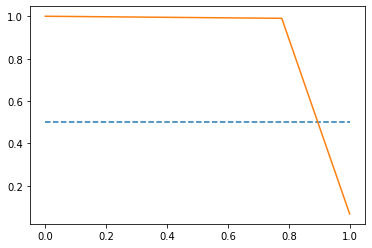

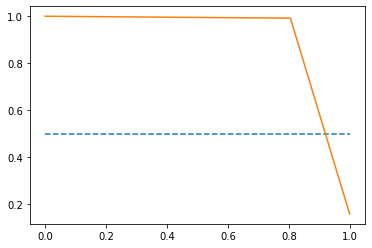

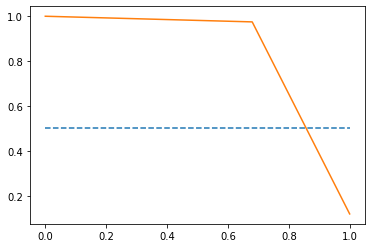

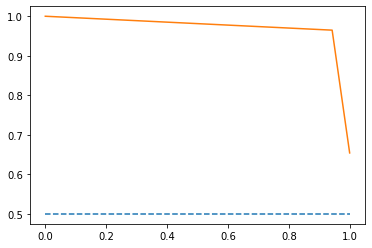

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

precision = dict()
recall = dict()
auc1 = dict()



for i in range(0,len(df.Target.unique())):
    precision[i],recall[i],_ = precision_recall_curve(y_test[:,i] , y_score[:,i] )
    auc1[i] = auc(recall[i] , precision[i])
    

for i in range(0,len(df.Target.unique())):
    plt.figure()
    plt.plot([0,1],[0.5,0.5], linestyle='--')
    plt.plot(recall[i],precision[i])

## Task 10: Check the accuracy using random forest with cross validation

In [37]:
#Hyper Parameter
#------------------
# What is Hyperparameter?
#
# The parameters that we set in the model is called Hyperparameter
#
# Every Algorithm(Model) has different set of Hyperparameters.
# Our Goal is to identify the best hyperparameter values that can improve the quality of the model
# This can be achieved using Hyperparameter Tuning
#
#
# Is Hyperparameter Tuning Mandatory?
#
# If you achieve the best quality model with default config, then this step is not required.

from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(max_depth=8)
#Uncomment the below lines if you want to find the best cv value
'''
def determine_cv(model, features,label):
    score_mean = 0
    ideal_cv = 0
    ideal_scores= 0
    for i in range(2,1000):
        scores = cross_val_score(model,
                                features,
                                label,
                                cv=i)
        if scores.mean() > score_mean:
            score_mean = scores.mean()
            ideal_cv = i
            ideal_scores= scores
            

    return [score_mean, ideal_cv, ideal_scores]

score_mean, ideal_cv, ideal_scores= determine_cv(model, RFE_features,label)

#1. To get the minimum score threshold
print("Minimum Score Threshold is : ",ideal_scores.mean())

#. To understand what max score I can acheive from the dataset
print("Max Score Achievable is: ",ideal_scores.max())
'''

'\ndef determine_cv(model, features,label):\n    score_mean = 0\n    ideal_cv = 0\n    ideal_scores= 0\n    for i in range(2,1000):\n        scores = cross_val_score(model,\n                                features,\n                                label,\n                                cv=i)\n        if scores.mean() > score_mean:\n            score_mean = scores.mean()\n            ideal_cv = i\n            ideal_scores= scores\n            \n\n    return [score_mean, ideal_cv, ideal_scores]\n\nscore_mean, ideal_cv, ideal_scores= determine_cv(model, RFE_features,label)\n\n#1. To get the minimum score threshold\nprint("Minimum Score Threshold is : ",ideal_scores.mean())\n\n#. To understand what max score I can acheive from the dataset\nprint("Max Score Achievable is: ",ideal_scores.max())\n'

In [38]:
### Conclusion: Ideal cv with greatest min threshold = 750

In [39]:
## HyperParameter Tuning

In [ ]:
#Method 1: Technique to Perform Hyperparamter tuning using GridSearchCV

#1. Design your parameter grid. In Python Parameter grid must be represented in the form of dictionary
model = RandomForestClassifier()
max_depth = np.arange(1,15)
n_estimators = np.arange(1,15)

paramGrid = dict(max_depth = max_depth, 
                 n_estimators = n_estimators)


#2. Apply GridSearchCV to identify the best values for each Hyperparameter

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,
                   param_grid=paramGrid,
                   cv=750)
#3. Execute Grid Search
grid.fit(features,label)

#4.Check Results

print (grid.best_score_)

print (grid.best_params_)

print (grid.best_estimator_)

In [ ]:
#Method 2: Technique to Perform Hyperparamter tuning using GridSearchCV

#1. Design your parameter grid. In Python Parameter grid must be represented in the form of dictionary
model = RandomForestClassifier()
max_depth = np.arange(1,15)
n_estimators = np.arange(1,15)

paramGrid = dict(max_depth = max_depth, 
                 n_estimators = n_estimators)


#2. Apply GridSearchCV to identify the best values for each Hyperparameter

from sklearn.model_selection import RandomizedSearchCV
rGrid = RandomizedSearchCV(model,
                   param_distributions=paramGrid,
                   cv=750, n_iter=60)
#3. Execute RGrid
rGrid.fit(features,label)

#4. Check Results
print (rGrid.best_score_)

print (rGrid.best_params_)

print (rGrid.best_estimator_)

### Conclusion: We are getting better results from For loop as done in step 9. Hence let us proceed with it

In [ ]:
?RandomForestClassifier

In [78]:
#Method1: K-Fold Cross Validation Technique

#1. Initialize the algorithm'

from sklearn.model_selection import KFold
modelAlgo = RandomForestClassifier(max_depth=8)


#2. Initialize K-Fold Function


#Ensure n_splits = cv value
kfold = KFold(n_splits=750,
             shuffle=True,
             random_state = 1) #Goal of RS is to persist my KFOLD so that we can extract the samples

#3. Initialize For Loop to identify which sample split gives the best score
def get_ideal_test_train_split(kfold, features,label):
    counter = 0
    best_split = test_s = train_s =0
    Xtrain = Xtest = ytrain = ytest = None
    ideal_model = None
    for train,test in kfold.split(features):
        #Counter will help track the sample
        counter = counter + 1

        #Extract training set and testing set
        X_train,X_test = features[train],features[test]
        y_train,y_test = label[train],label[test]

        #Fit data with model algo
        #print ("We are going to fit")
        modelAlgo.fit(X_train,y_train)
        #print ("End We are going to fit")
        #print ("Score %r " % modelAlgo.score(X_test,y_test))
        train_score = modelAlgo.score(X_train,y_train)
        test_score = modelAlgo.score(X_test,y_test)
        if test_score >= 1.0:
            print("Test Score: {}, Train Score: {}, for Sample Split {}".format(test_score,train_score,counter))
            if train_score > train_s:
                train_s = train_score
                test_s = test_score
                best_split = counter
                ideal_model = modelAlgo
                Xtrain,Xtest, ytrain,ytest = X_train,X_test,y_train,y_test
    return [train_s, test_s, best_split,Xtrain,Xtest, ytrain,ytest, ideal_model]
        
train_s, test_s, best_split , Xtrain,Xtest, ytrain,ytest, ideal_model = get_ideal_test_train_split(kfold, features,label)
print (" Max test score of {} corresponding to train score {} with sample split {} ".format(test_s, train_s, best_split))

#Conclusion : Test Score: 1.0, Train Score: 0.7815610267155579, for Sample Split 697

Test Score: 1.0, Train Score: 0.7670787929589271, for Sample Split 69
Test Score: 1.0, Train Score: 0.7619446772841576, for Sample Split 108
Test Score: 1.0, Train Score: 0.7723176865046102, for Sample Split 167
Test Score: 1.0, Train Score: 0.761211232187762, for Sample Split 250
Test Score: 1.0, Train Score: 0.7687552388935457, for Sample Split 355
Test Score: 1.0, Train Score: 0.7773703509690938, for Sample Split 573
Test Score: 1.0, Train Score: 0.7731796752226296, for Sample Split 597
Test Score: 1.0, Train Score: 0.7657412257726558, for Sample Split 599
Test Score: 1.0, Train Score: 0.7796752226296491, for Sample Split 609
Test Score: 1.0, Train Score: 0.7665793609219487, for Sample Split 611
Test Score: 1.0, Train Score: 0.7632268203247774, for Sample Split 638
Test Score: 1.0, Train Score: 0.7668936616029335, for Sample Split 704
 Max test score of 1.0 corresponding to train score 0.7796752226296491 with sample split 609 


In [80]:
data = {'Model':['Random Forest with K Fold'],
        'Test Score':[1.0],
        'Train Score' :[0.77],
        'Sample Split':[609],
        'Max Depth': 8}
 
# Create DataFrames
Result_df_KFold= pd.DataFrame(data)
Result_df_KFold

,Model,Test Score,Train Score,Sample Split,Max Depth
0,Random Forest with K Fold,1.0,0.77,609,8


####  Case a: Train.csv was divided into train and test samples. Lets do prediction with these samples

In [83]:
ideal_model.fit(Xtrain,ytrain)
print (ideal_model.score(Xtrain,ytrain))
print (ideal_model.score(Xtest,ytest))
output = finalModel.predict(Xtest)
output_df = pd.DataFrame(output)
X_test_df = pd.DataFrame(Xtest)

#For display purpose using only v2a1(Monthly Rent  and no of rooms) though 140 Features were actually used
Predicted_RF = pd.concat([X_test_df.iloc[:,[0,2]], output_df] , axis =1,)
Predicted_RF.columns = ['Monthly Rent','No of rooms','Predicted Poverty Level']
Predicted_RF


0.7615505500261918
0.8333333333333334


,Monthly Rent,No of rooms,Predicted Poverty Level
0,770229.000000,8.0,4
1,0.000000,5.0,4
2,0.000000,9.0,2
3,70000.000000,4.0,4
4,110000.000000,5.0,4
5,0.000000,4.0,4
6,270000.000000,6.0,4
7,0.000000,5.0,4
8,0.000000,5.0,3
9,50807.164975,5.0,4


### Conclusion:

In [84]:
pd.concat([Result_df,Result_df_KFold], axis = 0 ,ignore_index =True)

,Max Depth,Model,Random State,Sample Split,Test Score,Train Score
0,8,Random Forest,90.0,NaN,0.793,0.785
1,8,Random Forest with K Fold,NaN,609.0,1.000,0.770
